In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the data
energy = pd.read_csv('U:\\projects\\data Science\\Energy Prediction Use Case\\data\\energy_merged.csv')
energy['date'] = pd.to_datetime(energy['date'], format="%Y-%m-%d %H:%M:%S")

In [3]:
energy.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,61200,Weekday,Monday
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,61800,Weekday,Monday
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,62400,Weekday,Monday
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,63000,Weekday,Monday
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,63600,Weekday,Monday


In [4]:
energy['date'].min()

Timestamp('2016-01-11 17:00:00')

In [5]:
energy['date'].max()
# 4.5 months of data at 10 mins interval

Timestamp('2016-05-27 18:00:00')

In [6]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 32 columns):
date           19735 non-null datetime64[ns]
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out        

## Data pre-processing

This step includes removing columns we do not need, check missing values, aggregate energy consumption by date and so on.

In [7]:
energy.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'NSM', 'WeekStatus',
       'Day_of_week'],
      dtype='object')

In [8]:
cols = ['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'NSM', 'WeekStatus',
       'Day_of_week']
energy.drop(cols, axis=1, inplace=True)
energy.sort_values(by=['date'], inplace=True)

In [9]:
energy.head()

,date,Appliances
0,2016-01-11 17:00:00,60
1,2016-01-11 17:10:00,60
2,2016-01-11 17:20:00,50
3,2016-01-11 17:30:00,50
4,2016-01-11 17:40:00,60


In [10]:
energy.shape

(19735, 2)

In [11]:
energy.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            19725, 19726, 19727, 19728, 19729, 19730, 19731, 19732, 19733,
            19734],
           dtype='int64', length=19735)

## Indexing with time series data

In [12]:
appliance = energy.groupby('date')['Appliances'].sum().reset_index()

In [13]:
appliance = appliance.set_index('date')
appliance.index

DatetimeIndex(['2016-01-11 17:00:00', '2016-01-11 17:10:00',
               '2016-01-11 17:20:00', '2016-01-11 17:30:00',
               '2016-01-11 17:40:00', '2016-01-11 17:50:00',
               '2016-01-11 18:00:00', '2016-01-11 18:10:00',
               '2016-01-11 18:20:00', '2016-01-11 18:30:00',
               ...
               '2016-05-27 16:30:00', '2016-05-27 16:40:00',
               '2016-05-27 16:50:00', '2016-05-27 17:00:00',
               '2016-05-27 17:10:00', '2016-05-27 17:20:00',
               '2016-05-27 17:30:00', '2016-05-27 17:40:00',
               '2016-05-27 17:50:00', '2016-05-27 18:00:00'],
              dtype='datetime64[ns]', name='date', length=19735, freq=None)

In [14]:
appliance.shape

(19735, 1)

In [15]:
#Average daily energy consumption Wh
daily = appliance['Appliances'].resample('D').mean()

In [16]:
daily.head()

date
2016-01-11    136.666667
2016-01-12     85.694444
2016-01-13     97.013889
2016-01-14    151.388889
2016-01-15    125.347222
Freq: D, Name: Appliances, dtype: float64

In [17]:
daily.shape

(138,)

In [18]:
# Average Daily appliance energy consumption for month Janurary/2016
daily['2016-01']

date
2016-01-11    136.666667
2016-01-12     85.694444
2016-01-13     97.013889
2016-01-14    151.388889
2016-01-15    125.347222
2016-01-16    125.277778
2016-01-17    142.708333
2016-01-18     93.958333
2016-01-19     83.263889
2016-01-20    114.444444
2016-01-21     92.638889
2016-01-22     45.694444
2016-01-23     93.055556
2016-01-24    150.277778
2016-01-25     65.763889
2016-01-26     71.319444
2016-01-27     45.625000
2016-01-28     37.500000
2016-01-29     48.055556
2016-01-30    130.486111
2016-01-31    129.444444
Freq: D, Name: Appliances, dtype: float64

In [19]:
# Average Daily appliance energy consumption for month Febrary/2016
daily['2016-02']

date
2016-02-01    155.902778
2016-02-02     77.916667
2016-02-03    132.916667
2016-02-04    100.347222
2016-02-05     62.569444
2016-02-06     83.194444
2016-02-07     79.375000
2016-02-08    147.361111
2016-02-09    125.763889
2016-02-10     96.388889
2016-02-11    106.250000
2016-02-12    117.847222
2016-02-13     96.111111
2016-02-14    102.430556
2016-02-15    117.708333
2016-02-16     93.194444
2016-02-17     66.805556
2016-02-18     83.750000
2016-02-19    119.097222
2016-02-20    100.763889
2016-02-21     88.611111
2016-02-22     93.402778
2016-02-23     88.680556
2016-02-24     77.986111
2016-02-25    125.069444
2016-02-26     94.097222
2016-02-27     83.263889
2016-02-28     53.472222
2016-02-29    157.152778
Freq: D, Name: Appliances, dtype: float64

In [22]:
#Average daily energy consumption Wh
weekly = appliance['Appliances'].resample('W').mean()

In [23]:
weekly.head()

date
2016-01-17    121.953642
2016-01-24     96.190476
2016-01-31     75.456349
2016-02-07     98.888889
2016-02-14    113.164683
Freq: W-SUN, Name: Appliances, dtype: float64

In [24]:
weekly.shape

(20,)

## Check Stationarity of Appliances energy consumption

A TS is said to be stationary if its **statistical properties** such as mean, variance remain **constant over time**. But why is it important? Most of the TS models work on the assumption that the TS is stationary. Intuitively, we can say that if a TS has a particular behaviour over time, there is a very high probability that it will follow the same in the future. Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series.  
  
Stationarity is defined using very strict criterion. However, for practical purposes we can assume the series to be stationary if it has constant statistical properties over time, ie. the following:  

**1. constant mean**  
**2. constant variance**  
**3. an autocovariance that does not depend on time.**  

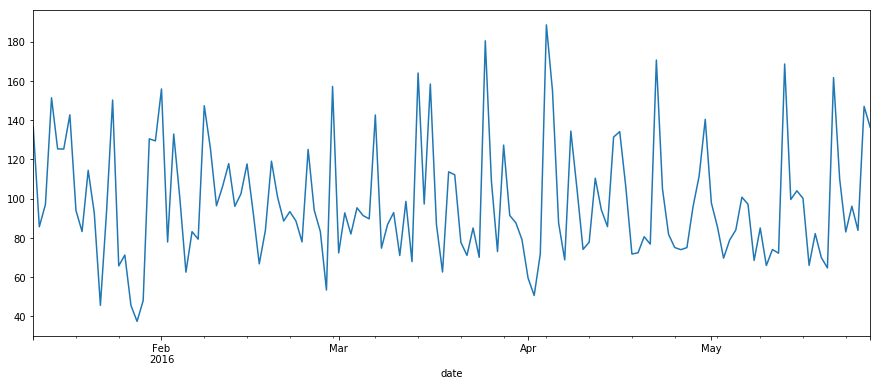

In [20]:
daily.plot(figsize=(15, 6))
plt.show()

Do not see any distinguishable patterns when we plot the data. The time-series has random peaks and lows, such as energy usage sometimes peaks duing month starting like Feb/Mar but sometimes lowest like Apr/May.

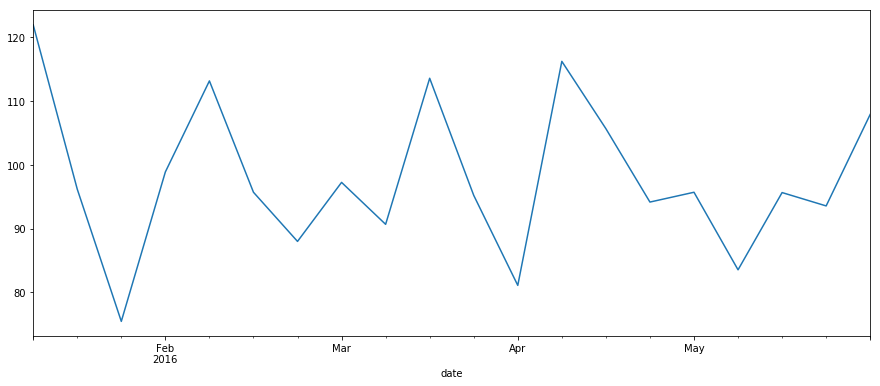

In [25]:
weekly.plot(figsize=(15, 6))
plt.show()


We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

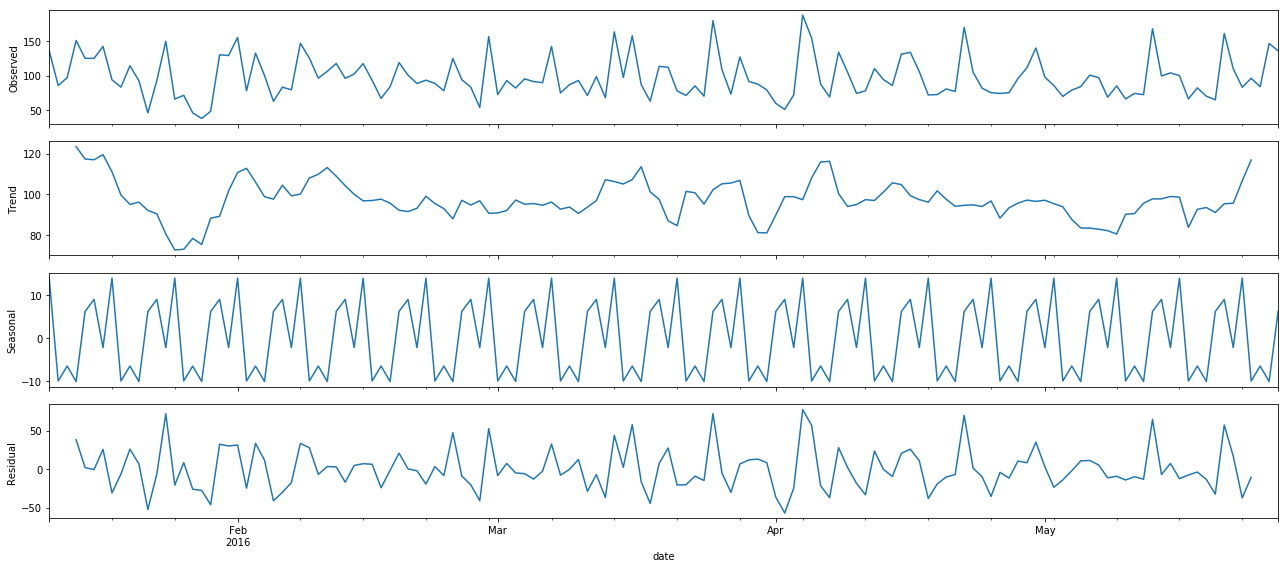

In [21]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(daily, model='additive')
fig = decomposition.plot()
plt.show()

The plot above clearly shows that the energy usage is unstable, along with its obvious irregularity.

In [26]:
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(weekly, model='additive')
fig = decomposition.plot()
plt.show()

ValueError: operands could not be broadcast together with shapes (20,) (86,) 